## Create dummy data and labels

This notebook is to show the functions of 'dummy_data_functions.py'. It can:
+ Add sines of different frequencies to create a signal.
+ Create and plot a distribution of frequencies within a range.
+ Get random frequencies from these frequency distributions.
+ Create random signals from any frequency distribution.
+ Organise data into subjects, epochs, and channels, along with a label.

Dummy data is useful for:
+ Running deep learning algorithms if no real EEG data is available.
+ Providing a standard method of organising EEG data into input for DL models.
+ Checking whether the models work by training on easily discernable dummy signals.
+ Reproducability of the results.
+ Comparing the learning speed and pattern recognition capabilities between different models.

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

from functions import dummy_data
from functions import display_helper


#### Data Variables:

In [2]:
duration = 2                                # Total duration signal (seconds)
sample_rate = 512                           # Data points per second (Hertz)
N_time_points = sample_rate * duration      # Total number of data points
time_points = np.linspace(0, duration, N_time_points, endpoint=False)

N_combined_freq = 100                       # Number of frequencies to form signal
max_freq = 200                              # Maximum frequency of signal
freq_sample_rate = 10                       # Resolution of frequency
N_freq_points = max_freq * freq_sample_rate

frequencies = np.linspace(0, max_freq, N_freq_points, endpoint=False)
freq_distribution = dummy_data.generate_frequency_distribution("planck", max_freq, freq_sample_rate)

#### Create a Dummy signal

+ Add sines of different frequencies to create a signal.

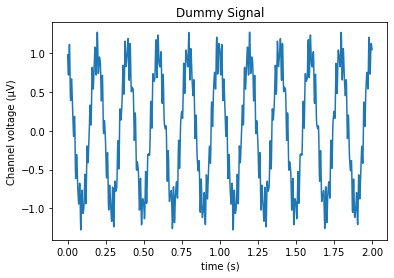

In [3]:
signal = dummy_data.generate_sine_wave(5, time_points)
noise = dummy_data.generate_sine_wave(60, time_points) * 0.2
noise += dummy_data.generate_sine_wave(600, time_points) * 0.1

wave = signal + noise
display_helper.show_plot(time_points, wave, "Dummy Signal", "time (s)", "Channel voltage (\u03BCV)")

#### Frequency Probability Distribution 
+ Create and plot a distribution of frequencies within the range of 0-200 Hz. 
+ The frequency distribution below is roughly similar to the Fourier Transform of real EEG data.

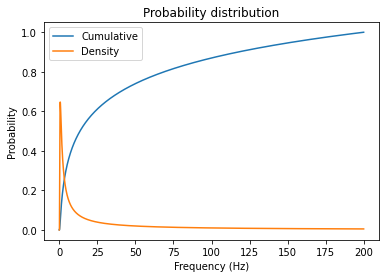

In [4]:
cumulative = np.cumsum(freq_distribution)
cumulative /= cumulative[-1] # Normalise

display_helper.show_plot(frequencies, [cumulative, freq_distribution/cumulative[-1]], "Probability distribution", 
            "Frequency (Hz)", "Probability", ["Cumulative", "Density"])

#### Get Random Frequencies from Density Distribution 
+ Frequencies are randomly drawn from the frequency distribution. These frequencies are used to make a signal.

In [5]:
print("Random Frequencies from Distribution:")
for i in range(5):
    print(f'{dummy_data.random_frequency_from_density_distribution(max_freq, freq_distribution):.3f}')

Random Frequencies from Distribution:
113.100
13.400
124.500
92.000
0.800


#### Create Signals from these Random Frequencies
+ Signals can be generated from any frequency distribution.

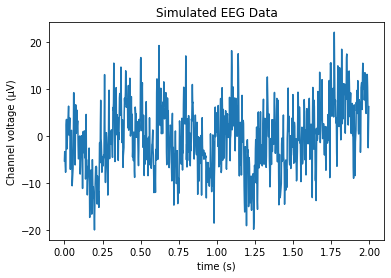

In [6]:
epoch = dummy_data.generate_epoch(freq_distribution, N_combined_freq, max_freq, duration, sample_rate)
display_helper.show_plot(time_points, epoch, "Simulated EEG Data", "time (s)", "Channel voltage (\u03BCV)")

#### Fourier Transform of Dummy Signal

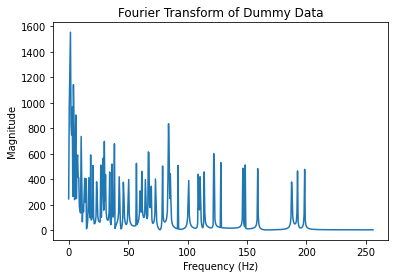

In [7]:
epoch_FT = rfft(epoch)
freq = rfftfreq(duration * sample_rate, 1 / sample_rate)
display_helper.show_plot(freq, np.abs(epoch_FT), "Fourier Transform of Dummy Data", "Frequency (Hz)", "Magnitude")

#### Generating Data
+ Put signals into array with dimensions (subjects, channels, epochs) 
+ Subjects in group 1 have a 'planck's law' frequency distribution
+ Subjects in group 2 have a linear frequency distribution


In [8]:
subjects_1 = []
N_subjects_1 = 5
planck_distribution = dummy_data.generate_frequency_distribution("planck", max_freq, freq_sample_rate)

subjects_2 = []
N_subjects_2 = 5
lin_distribution = dummy_data.generate_frequency_distribution("linear", max_freq, freq_sample_rate)

N_epochs = 5
N_channels = 8

for i in range(N_subjects_1):
    epochs = []
    for k in range(N_epochs):
        channels = []
        for j in range(N_channels):
            channels.append(dummy_data.generate_epoch(planck_distribution, N_combined_freq, max_freq, duration, sample_rate))
        epochs.append(channels)
    subjects_1.append(epochs)

for i in range(N_subjects_2):
    epochs = []
    for k in range(N_epochs):
        channels = []
        for j in range(N_channels):
            channels.append(dummy_data.generate_epoch(lin_distribution, N_combined_freq, max_freq, duration, sample_rate))
        epochs.append(channels)
    subjects_2.append(epochs)


Create Labels

In [9]:
subjects = np.concatenate([subjects_1,subjects_2])
labels = np.concatenate([np.ones(len(subjects_1)),np.zeros(len(subjects_2))])

print(labels)

[1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


#### Plot Generated Data


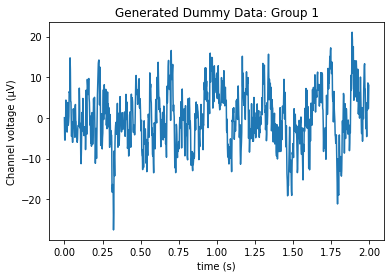

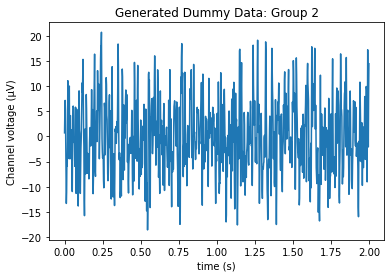

In [10]:
subject_index = 2
channel_index = 7
epoch_index = 1

time_points = np.linspace(0, duration, N_time_points, endpoint=False)
display_helper.show_plot(time_points, subjects_1[subject_index][epoch_index][channel_index], "Generated Dummy Data: Group 1", "time (s)", "Channel voltage (\u03BCV)")
display_helper.show_plot(time_points, subjects_2[subject_index][epoch_index][channel_index], "Generated Dummy Data: Group 2", "time (s)", "Channel voltage (\u03BCV)")

#### Fourier transform of the above signal

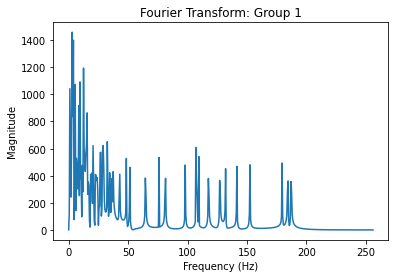

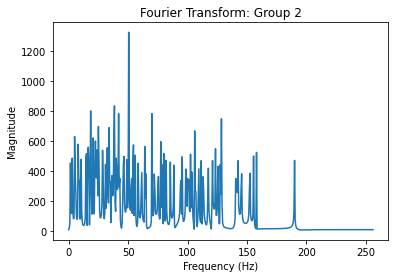

In [11]:
epoch_FT = rfft(subjects_1[subject_index][epoch_index][channel_index])
freq = rfftfreq(duration * sample_rate, 1 / sample_rate)
display_helper.show_plot(freq, np.abs(epoch_FT), "Fourier Transform: Group 1", "Frequency (Hz)", "Magnitude")

epoch_FT = rfft(subjects_2[subject_index][epoch_index][channel_index])
freq = rfftfreq(duration * sample_rate, 1 / sample_rate)
display_helper.show_plot(freq, np.abs(epoch_FT), "Fourier Transform: Group 2", "Frequency (Hz)", "Magnitude")